# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

2023-03-01 17:03:13.589900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 17:03:13.673746: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-01 17:03:14.118382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 17:03:14.118417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2023-03-01 17:03:15.562541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:15.573912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:15.574041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# 1.0 Import the Dataset

In [6]:
model_name = 'K49'
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

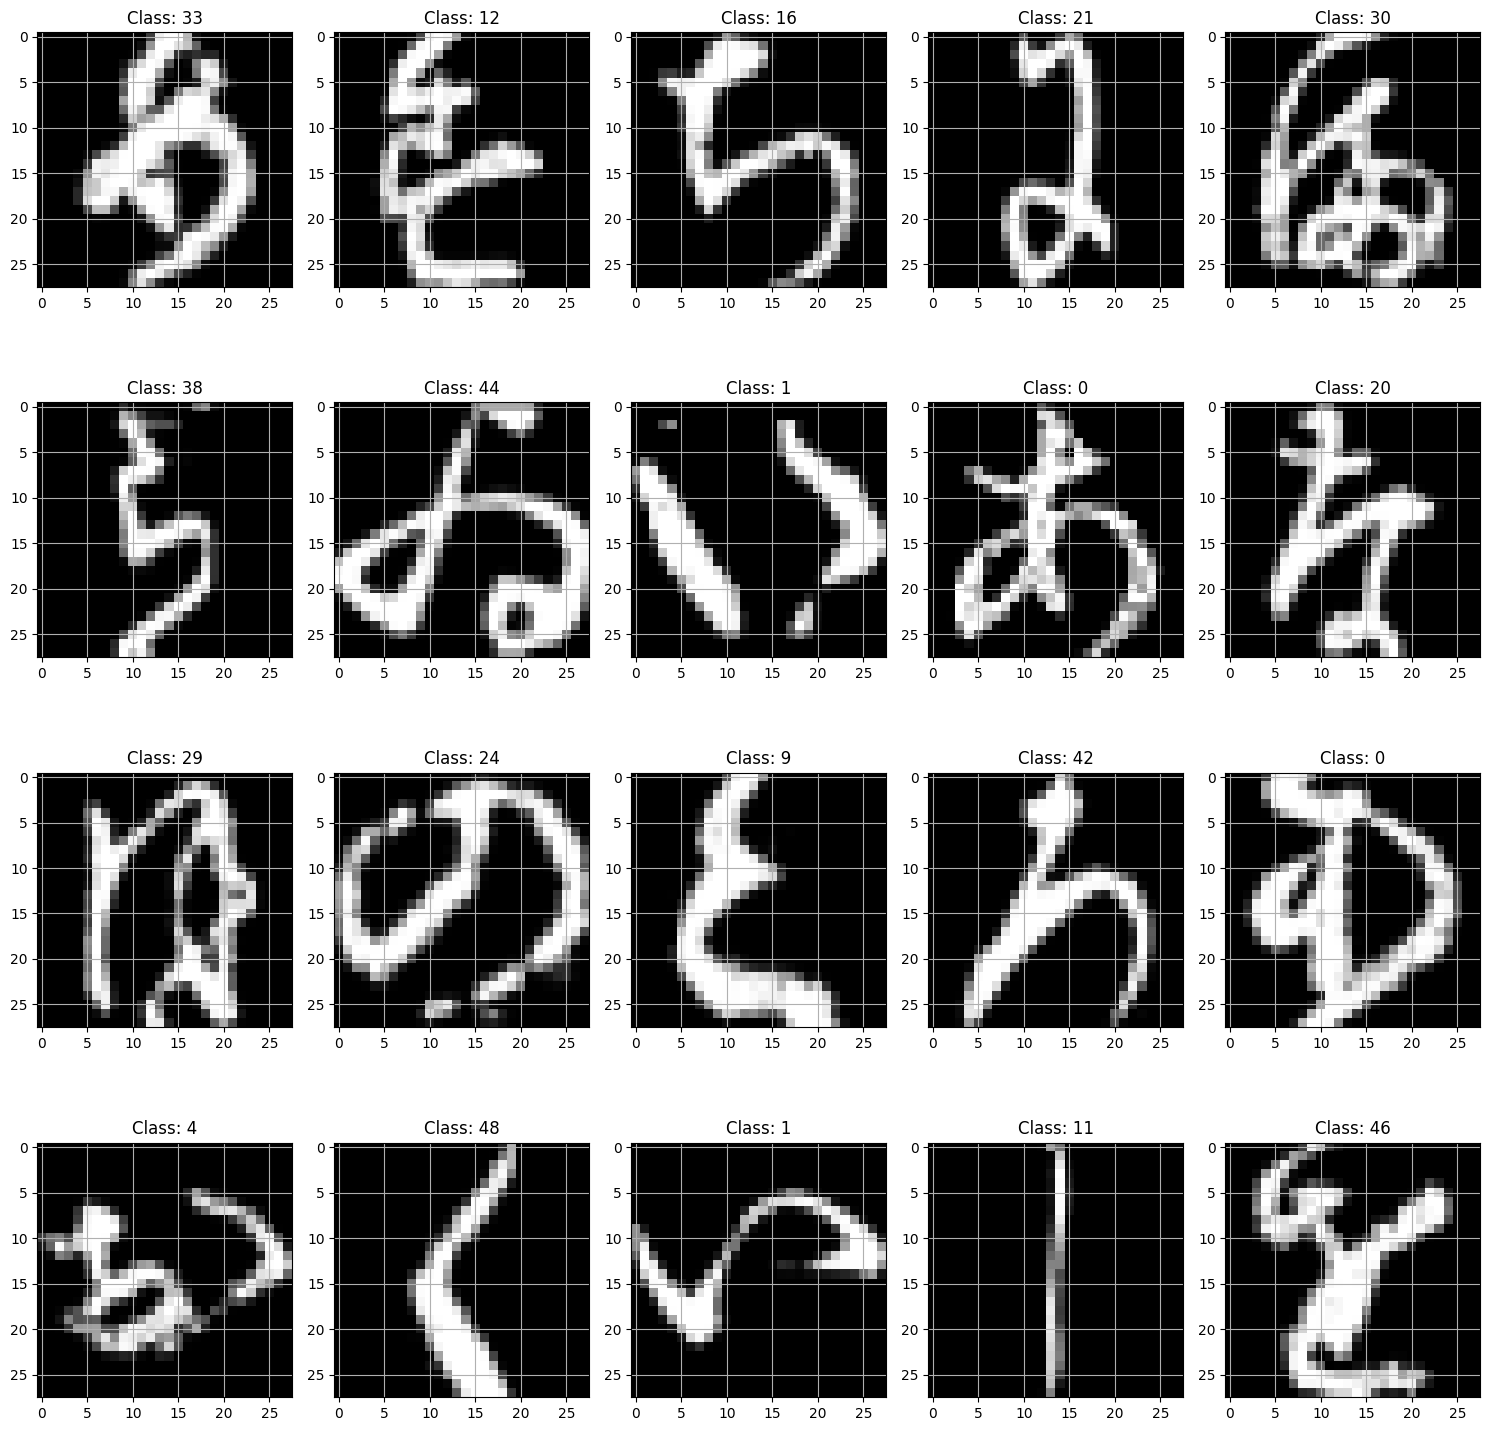

In [7]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_train[:n_images,...,0], dataset.y_train[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [8]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True, custom_path='bin/efficient_capsnetK49_new_train.h5')

2023-03-01 17:03:22.070331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 17:03:22.070914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:22.071064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:22.071151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 96)  

# 3.0 Train the Model

In [ ]:
model_train.config['epochs'] = 150
model_train.config['lr_dec'] = 0.97
model_train.config['lr'] = 2e-4
model_train.config['min_lr'] = 3e-5
# model_train.load_graph_weights()
history = model_train.train(dataset, initial_epoch=0)

------------------------------K49 train------------------------------
Layer PrimaryCaps has arguments ['F', 'K', 'N', 'D', 's']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


2023-03-01 17:03:24.293318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:24.293494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:24.293582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:24.293699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 17:03:24.293790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 1/150


2023-03-01 17:03:26.538220: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2023-03-01 17:03:27.024200: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fec757ed640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-01 17:03:27.024221: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-01 17:03:27.101845: W tensorflow/compiler/xla/service/gpu/nvptx_helper.cc:56] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.2
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=

11619/11619 [==============================] - ETA: 0s - loss: 0.1880 - Efficient_CapsNet_loss: 0.1575 - Generator_loss: 0.0778 - Efficient_CapsNet_accuracy: 0.8301
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.94352, saving model to bin/efficient_capsnetK49_new_train.h5
11619/11619 [==============================] - 89s 7ms/step - loss: 0.1880 - Efficient_CapsNet_loss: 0.1575 - Generator_loss: 0.0778 - Efficient_CapsNet_accuracy: 0.8301 - val_loss: 0.0856 - val_Efficient_CapsNet_loss: 0.0522 - val_Generator_loss: 0.0853 - val_Efficient_CapsNet_accuracy: 0.9435 - lr: 2.0000e-04
Epoch 2/150
11617/11619 [============================>.] - ETA: 0s - loss: 0.0902 - Efficient_CapsNet_loss: 0.0609 - Generator_loss: 0.0748 - Efficient_CapsNet_accuracy: 0.9350
Epoch 2: val_Efficient_CapsNet_accuracy improved from 0.94352 to 0.95886, saving model to bin/efficient_capsnetK49_new_train.h5
11619/11619 [==============================] - 86s 7ms/step - loss: 0.0902 - Efficient_CapsN

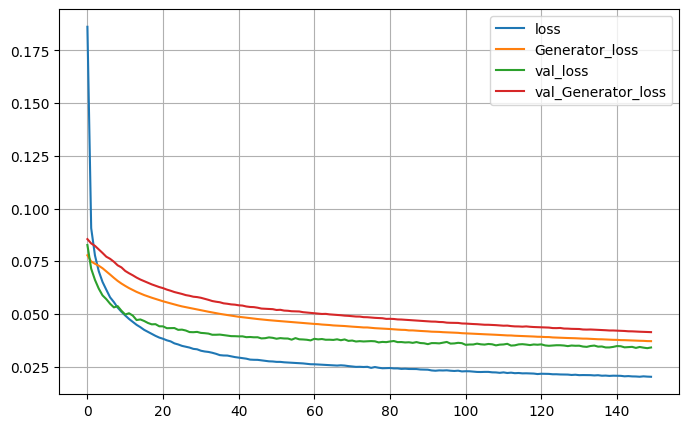

In [8]:
plotHistory(history)

In [ ]:
import pandas as pd
pd.DataFrame(history.history).to_csv('k49_history.csv')

# 4.0 Test the Model

In [8]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path='bin/efficient_capsnetK49_new_train.h5')
model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 96)  

In [9]:
model_test.evaluate(dataset.X_test, dataset.y_test)

------------------------------K49 Evaluation------------------------------
1205/1205 [==============================] - 3s 2ms/step
Test acc: 0.9665084182945495
Test error [%]: 3.3492%
N° misclassified images: 1291 out of 38547


In [10]:
import numpy as np
y_pred, X_gen = model_test.model.predict(dataset.X_test)
y_pred_label = np.argmax(y_pred, 1)
y_test_label = np.argmax(dataset.y_test, 1)
accs = []
for cls in range(49):
  mask = (y_test_label == cls)
  cls_acc = (y_pred_label == cls)[mask].mean() # Accuracy for rows of class cls
  accs.append(cls_acc)


accs = np.mean(accs) # Final balanced accuracy
accs

1205/1205 [==============================] - 3s 2ms/step


0.9613918649104533